<a href="https://colab.research.google.com/github/Ohalu909/AI-for-gamedev/blob/main/AIG_assignment_3_HGBR_gameplay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NURSYAZWANI BINTI MOHAMMAD 17206746

# AFIFAH BINTI ABDUL HALIM 17203106


In [ ]:
!pip install neurokit2 shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 10.2 MB/s eta 0:00:00


In [ ]:
# load Python packages
import pandas as pd
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
from tqdm import tqdm
import shap

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load Maze Ball dataset
mb_data = pd.read_json("/content/mazeball.json")
mb_data = mb_data.mazeball.apply(pd.Series)
# data entries
mb_data.keys()

Index(['demographics', 'games', 'tutorial'], dtype='object')

In [ ]:
# player demographics
# each entry contains demographic information for one player
p_demo = mb_data['demographics']
p_games = mb_data['games']
p_tutorial = mb_data['tutorial']
print("There are {} players in the dataset.".format(p_demo.shape))

There are (36,) players in the dataset.


In [ ]:
# let's take the first player as an example
player_no = 0
print("Player information: ")
print(p_demo[player_no])

p_games = mb_data['games']
print("Number of sets of games played by this player is {}".format(np.shape(p_games[player_no])))

Player information: 
{'player_id': 1, 'age': 26, 'male': 1, 'playgames': 1, 'playgamesfrequency': 5}
Number of sets of games played by this player is (4,)


In [ ]:
# let's take set 0 as an example
game_set_no = 0

# each entry contains game data and player preferences
p_games[player_no][game_set_no].keys()

dict_keys(['data', 'preferences'])

In [ ]:
p_games_data = p_games[player_no][game_set_no]['data']
p_games_pref = p_games[player_no][game_set_no]['preferences']

print("Information in data: ", p_games_data.keys())
print("Information in pref: ", p_games_pref.keys())

Information in data:  dict_keys(['A', 'B'])
Information in pref:  dict_keys(['anxiety', 'challenge', 'excitement', 'boredom', 'frustration', 'relaxation', 'fun'])


In [ ]:
# in each set, players played Game A and Game B
# for subjective ratings, players were asked whether they felt more "Anxiety" or "Challenge" etc when playing Game A or Game B
print(p_games_pref['anxiety'])
print(p_games_pref['challenge'])
print(p_games_pref['excitement'])
print(p_games_pref['boredom'])
print(p_games_pref['frustration'])
print(p_games_pref['relaxation'])
print(p_games_pref['fun'])

B
B
B
A
Both equally
Both equally
B


In [ ]:
print("Physiological signals include ", p_games_data['A'][game_set_no]['physio'].keys())

Physiological signals include  dict_keys(['SC', 'BVP', 'time'])


In [ ]:
print("Gameplay include ", p_games_data['A'][game_set_no]['gameplay'].keys())

Gameplay include  dict_keys(['event', 'score', 'distance2pellets_euclidean', 'time', 'distance2enemies_path', 'distance2camera', 'distance2enemies_euclidean', 'mapdiscovered', 'tilevisits', 'distance2pellets_path'])


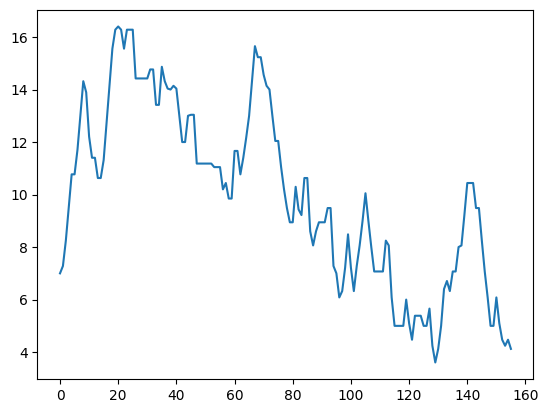

In [ ]:
sample_signal = p_games_data['A'][game_set_no]['gameplay']['distance2enemies_euclidean']
plt.plot(sample_signal)

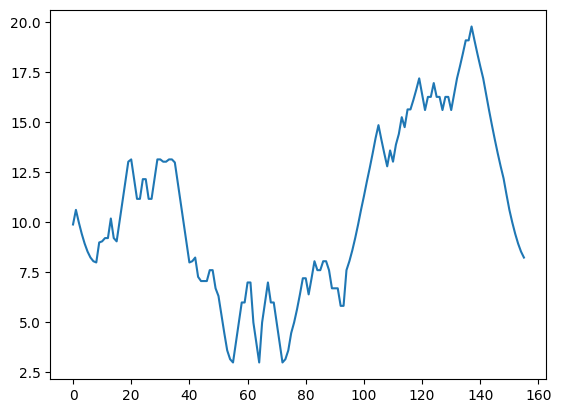

In [ ]:
sample_signal = p_games_data['A'][game_set_no]['gameplay']['distance2pellets_euclidean']
plt.plot(sample_signal)

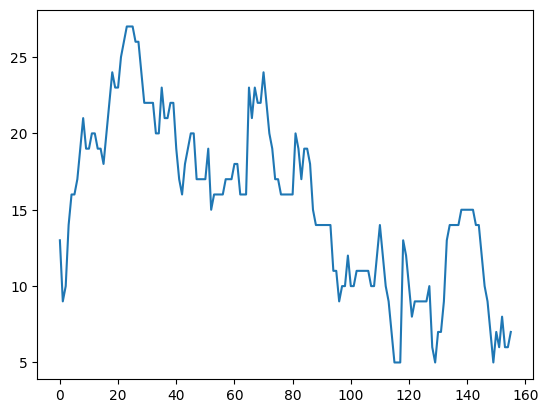

In [ ]:
sample_signal = p_games_data['A'][game_set_no]['gameplay']['distance2enemies_path']
plt.plot(sample_signal)

In [ ]:
# time stamps for data recording; one sample measured every 0.03 seconds
# print(p_games_data['A'][game_set_no]['gameplay']['time'])
print("Sampling rate is {:.1f} Hz".format(1./p_games_data['A'][game_set_no]['gameplay']['time'][1]))

Sampling rate is 1.1 Hz


In [ ]:
# Assuming p_games_data is a dictionary and game_set_no is a variable with a valid value
gameplay_keys = p_games_data['A'][game_set_no]['gameplay'].keys()

print("Gameplay keys:", gameplay_keys)

for key in gameplay_keys:
    value = p_games_data['A'][game_set_no]['gameplay'][key]
    print(f"{key}: {value}")


Gameplay keys: dict_keys(['event', 'score', 'distance2pellets_euclidean', 'time', 'distance2enemies_path', 'distance2camera', 'distance2enemies_euclidean', 'mapdiscovered', 'tilevisits', 'distance2pellets_path'])
event: ['ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'Pellet', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'Pellet', 'ChangeTile', 'Stop', 'ChangeTile', 'Stop', 'ChangeTile', 'ChangeTile', 'Enemy', 'ChangeTile', 'Stop', 'ChangeTile', 'Stop', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'Enemy', 'Enemy', 'ChangeTile', 'Enemy', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'ChangeTile', 'Pellet', 'ChangeTi

In [ ]:
print(gameplay_keys)

dict_keys(['event', 'score', 'distance2pellets_euclidean', 'time', 'distance2enemies_path', 'distance2camera', 'distance2enemies_euclidean', 'mapdiscovered', 'tilevisits', 'distance2pellets_path'])


In [ ]:
import pandas as pd

# Assuming gameplay_data is a dictionary with keys like 'event', 'score', 'distance2pellets_euclidean', etc.
# You can replace 'your_column_name' with the actual keys you want to analyze

# Extract relevant keys from gameplay_data
selected_keys = ['score', 'distance2pellets_euclidean', 'time', 'distance2enemies_path', 'distance2camera', 'distance2enemies_euclidean', 'mapdiscovered', 'tilevisits', 'distance2pellets_path']

# Create a DataFrame with selected keys and their values
# gameplay_df = pd.DataFrame({key: gameplay_keys[key] for key in selected_keys})
gameplay_df = pd.DataFrame({key: p_games_data['A'][game_set_no]['gameplay'][key] for key in selected_keys})


# Calculate mean
mean_values = gameplay_df.mean()

# Calculate standard deviation
std_values = gameplay_df.std()

# Calculate minimum
min_values = gameplay_df.min()

# Calculate maximum
max_values = gameplay_df.max()

# Concatenate the results into a new DataFrame
features_df = pd.concat([mean_values, std_values, min_values, max_values], axis=1)
features_df.columns = ['Mean', 'Std', 'Min', 'Max']

# Print or further analyze the DataFrame
print(features_df)


                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000


In [ ]:
# Assuming gameplay_data is a dictionary with keys like 'event', 'score', 'distance2pellets_euclidean', etc.
# You can replace 'your_column_name' with the actual keys you want to analyze

# Extract relevant keys from gameplay_data
# selected_keys = ['event', 'score', 'distance2pellets_euclidean', 'time', 'distance2enemies_path', 'distance2camera', 'distance2enemies_euclidean', 'mapdiscovered', 'tilevisits', 'distance2pellets_path']
selected_keys = ['distance2pellets_euclidean']

# Create a DataFrame with selected keys and their values
# gameplay_df = pd.DataFrame({key: gameplay_data[key] for key in selected_keys})
gameplay_df = pd.DataFrame({key: p_games_data['A'][game_set_no]['gameplay'][key] for key in selected_keys})


# Calculate mean
mean_values = gameplay_df.mean()

# Calculate standard deviation
std_values = gameplay_df.std()

# Calculate minimum
min_values = gameplay_df.min()

# Calculate maximum
max_values = gameplay_df.max()

# Concatenate the results into a new DataFrame
features_df = pd.concat([mean_values, std_values, min_values, max_values], axis=1)
features_df.columns = ['Mean', 'Std', 'Min', 'Max']

# Print or further analyze the DataFrame
print(features_df)


                                 Mean      Std  Min       Max
distance2pellets_euclidean  10.527558  4.27189  3.0  19.79899


Gameplay Feature Extraction:

In [ ]:
def extract_gameplay(signal):
  selected_keys = ['score', 'distance2pellets_euclidean', 'time', 'distance2enemies_path', 'distance2camera', 'distance2enemies_euclidean', 'mapdiscovered', 'tilevisits', 'distance2pellets_path']

  # Create a DataFrame with selected keys and their values
  # gameplay_df = pd.DataFrame({key: gameplay_data[key] for key in selected_keys})
  gameplay_df = pd.DataFrame({key: p_games_data['A'][game_set_no]['gameplay'][key] for key in selected_keys})

  # Calculate mean
  mean_values = gameplay_df.mean()

  # Calculate standard deviation
  std_values = gameplay_df.std()

  # Calculate minimum
  min_values = gameplay_df.min()

  # Calculate maximum
  max_values = gameplay_df.max()

  # Concatenate the results into a new DataFrame
  features_df = pd.concat([mean_values, std_values, min_values, max_values], axis=1)
  features_df.columns = ['Mean', 'Std', 'Min', 'Max']

  # Print or further analyze the DataFrame
  print(features_df)
  return features_df

Create dataset for Gameplay:

In [ ]:
alldata = {
    'player_id': [],
    'player_age': [],
    'player_gender': [],
    'player_playgames': [],
    'player_playfrequency': [],
    # 'game_variant': [],
    'features_score_mean': [],
    'features_score_std': [],
    'features_score_min': [],
    'features_score_max': [],
    'features_distance_mean': [],
    'features_distance_std': [],
    'features_distance_min': [],
    'features_distance_max': [],
    # Add other relevant gameplay features here
    'features_time_mean': [],
    'features_time_std': [],
    'features_time_min': [],
    'features_time_max': [],

    'features_distance2enemies_path_mean': [],
    'features_distance2enemies_path_std': [],
    'features_distance2enemies_path_min': [],
    'features_distance2enemies_path_max': [],

    'features_distance2camera_mean': [],
    'features_distance2camera_std': [],
    'features_distance2camera_min': [],
    'features_distance2camera_max': [],

    'features_distance2enemies_euclidean_mean': [],
    'features_distance2enemies_euclidean_std': [],
    'features_distance2enemies_euclidean_min': [],
    'features_distance2enemies_euclidean_max': [],

    'features_mapdiscovered_mean': [],
    'features_mapdiscovered_std': [],
    'features_mapdiscovered_min': [],
    'features_mapdiscovered_max': [],

    'features_tilevisits_mean': [],
    'features_tilevisits_std': [],
    'features_tilevisits_min': [],
    'features_tilevisits_max': [],

    'features_distance2pellets_path_mean': [],
    'features_distance2pellets_path_std': [],
    'features_distance2pellets_path_min': [],
    'features_distance2pellets_path_max': [],

    'class': [],
}

for a in tqdm(range(36)):  # player number
    player_demographics = p_demo[a]  # player demographics
    player_game = p_games[a]
    player_tutorial = p_tutorial[a]

    for b in range(len(player_game)):  # game number
        game_pref = p_games[a][b]['preferences']

        # Call the extract_gameplay function
        gameplay_features_df = extract_gameplay(p_games_data['A'][game_set_no]['gameplay'])

        # Ensure consistent lengths
        num_instances = 2  # Number of instances for each game (Game A and Game B)
        num_features = len(gameplay_features_df.columns)  # Number of features from extract_gameplay

        # Extend lists with consistent lengths
        alldata['player_id'].extend([player_demographics['player_id']] * num_instances)
        alldata['player_age'].extend([player_demographics['age']] * num_instances)
        alldata['player_gender'].extend([player_demographics['male']] * num_instances)
        alldata['player_playgames'].extend([player_demographics['playgames']] * num_instances)
        alldata['player_playfrequency'].extend([player_demographics['playgamesfrequency']] * num_instances)

        # Append information to alldata
        # alldata['player_id'].extend([player_demographics['player_id']] * 2)
        # alldata['player_age'].extend([player_demographics['age']] * 2)
        # alldata['player_gender'].extend([player_demographics['male']] * 2)
        # alldata['player_playgames'].extend([player_demographics['playgames']] * 2)
        # alldata['player_playfrequency'].extend([player_demographics['playgamesfrequency']] * 2)

        # alldata['game_variant'].extend([p_games_data['A'][game_set_no]['gameplay']['variant']] * 2)
        alldata['features_score_mean'].extend([gameplay_features_df['Mean']['score']] * 2)
        alldata['features_score_std'].extend([gameplay_features_df['Std']['score']] * 2)
        alldata['features_score_min'].extend([gameplay_features_df['Min']['score']] * 2)
        alldata['features_score_max'].extend([gameplay_features_df['Max']['score']] * 2)

        alldata['features_distance_mean'].extend([gameplay_features_df['Mean']['distance2pellets_euclidean']] * 2)
        alldata['features_distance_std'].extend([gameplay_features_df['Std']['distance2pellets_euclidean']] * 2)
        alldata['features_distance_min'].extend([gameplay_features_df['Min']['distance2pellets_euclidean']] * 2)
        alldata['features_distance_max'].extend([gameplay_features_df['Max']['distance2pellets_euclidean']] * 2)

        # Add other relevant gameplay features here
        alldata['features_time_mean'].extend([gameplay_features_df['Mean']['time']] * 2)
        alldata['features_time_std'].extend([gameplay_features_df['Std']['time']] * 2)
        alldata['features_time_min'].extend([gameplay_features_df['Min']['time']] * 2)
        alldata['features_time_max'].extend([gameplay_features_df['Max']['time']] * 2)

        alldata['features_distance2enemies_path_mean'].extend([gameplay_features_df['Mean']['distance2enemies_path']] * 2)
        alldata['features_distance2enemies_path_std'].extend([gameplay_features_df['Std']['distance2enemies_path']] * 2)
        alldata['features_distance2enemies_path_min'].extend([gameplay_features_df['Min']['distance2enemies_path']] * 2)
        alldata['features_distance2enemies_path_max'].extend([gameplay_features_df['Max']['distance2enemies_path']] * 2)

        alldata['features_distance2camera_mean'].extend([gameplay_features_df['Mean']['distance2camera']] * 2)
        alldata['features_distance2camera_std'].extend([gameplay_features_df['Std']['distance2camera']] * 2)
        alldata['features_distance2camera_min'].extend([gameplay_features_df['Min']['distance2camera']] * 2)
        alldata['features_distance2camera_max'].extend([gameplay_features_df['Max']['distance2camera']] * 2)

        alldata['features_distance2enemies_euclidean_mean'].extend([gameplay_features_df['Mean']['distance2enemies_euclidean']] * 2)
        alldata['features_distance2enemies_euclidean_std'].extend([gameplay_features_df['Std']['distance2enemies_euclidean']] * 2)
        alldata['features_distance2enemies_euclidean_min'].extend([gameplay_features_df['Min']['distance2enemies_euclidean']] * 2)
        alldata['features_distance2enemies_euclidean_max'].extend([gameplay_features_df['Max']['distance2enemies_euclidean']] * 2)

        alldata['features_mapdiscovered_mean'].extend([gameplay_features_df['Mean']['mapdiscovered']] * 2)
        alldata['features_mapdiscovered_std'].extend([gameplay_features_df['Std']['mapdiscovered']] * 2)
        alldata['features_mapdiscovered_min'].extend([gameplay_features_df['Min']['mapdiscovered']] * 2)
        alldata['features_mapdiscovered_max'].extend([gameplay_features_df['Max']['mapdiscovered']] * 2)

        alldata['features_tilevisits_mean'].extend([gameplay_features_df['Mean']['tilevisits']] * 2)
        alldata['features_tilevisits_std'].extend([gameplay_features_df['Std']['tilevisits']] * 2)
        alldata['features_tilevisits_min'].extend([gameplay_features_df['Min']['tilevisits']] * 2)
        alldata['features_tilevisits_max'].extend([gameplay_features_df['Max']['tilevisits']] * 2)

        alldata['features_distance2pellets_path_mean'].extend([gameplay_features_df['Mean']['distance2pellets_path']] * 2)
        alldata['features_distance2pellets_path_std'].extend([gameplay_features_df['Std']['distance2pellets_path']] * 2)
        alldata['features_distance2pellets_path_min'].extend([gameplay_features_df['Min']['distance2pellets_path']] * 2)
        alldata['features_distance2pellets_path_max'].extend([gameplay_features_df['Max']['distance2pellets_path']] * 2)

        # Generate labels based on preference ranking
        if game_pref['boredom'] == "A":  # if game A is more preferred than game B
            alldata['class'].extend([1, 0])  # class label for Game A
        elif game_pref['boredom'] == "B":  # if game B is more preferred
            alldata['class'].extend([0, 1])
        elif game_pref['boredom'] == "Both equally":
            alldata['class'].extend([1, 1])
        elif game_pref['boredom'] == "Neither":
            alldata['class'].extend([0, 0])

# Convert the dictionary to a DataFrame
alldata_df = pd.DataFrame(alldata)


  0%|          | 0/36 [00:00<?, ?it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

  6%|▌         | 2/36 [00:00<00:02, 16.25it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 11%|█         | 4/36 [00:00<00:02, 13.54it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 17%|█▋        | 6/36 [00:00<00:02, 11.59it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 22%|██▏       | 8/36 [00:00<00:02, 10.38it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 31%|███       | 11/36 [00:00<00:01, 13.65it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 36%|███▌      | 13/36 [00:00<00:01, 14.93it/s]


                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000


 42%|████▏     | 15/36 [00:01<00:01, 15.99it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 47%|████▋     | 17/36 [00:01<00:01, 16.69it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 56%|█████▌    | 20/36 [00:01<00:00, 17.82it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 64%|██████▍   | 23/36 [00:01<00:00, 19.09it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 72%|███████▏  | 26/36 [00:01<00:00, 20.35it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 81%|████████  | 29/36 [00:01<00:00, 21.36it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 89%|████████▉ | 32/36 [00:01<00:00, 20.99it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

 97%|█████████▋| 35/36 [00:02<00:00, 20.54it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

100%|██████████| 36/36 [00:02<00:00, 17.34it/s]

                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distance2enemies_path       15.391026   5.516630  5.000000   27.000000
distance2camera             16.373888   6.800215  0.584038   28.696976
distance2enemies_euclidean   9.951942   3.449712  3.605551   16.401219
mapdiscovered               43.532051  23.514558  1.000000   87.000000
tilevisits                  65.032051  37.322901  1.000000  132.000000
distance2pellets_path       16.910256   6.187784  5.000000   29.000000
                                 Mean        Std       Min         Max
score                       64.102564  48.790160  0.000000  150.000000
distance2pellets_euclidean  10.527558   4.271890  3.000000   19.798990
time                        45.002154  25.667826  0.000000   89.435000
distan

Hits Gradient Boosting Regression:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Assuming 'alldata' is your dataset dictionary
# Convert the dictionary to a DataFrame
alldata_df = pd.DataFrame(alldata)

# Extract features and target variable
X = alldata_df.drop(['class'], axis=1)  # Features
Y = alldata_df['class']  # Target variable

# Pairwise Data Generation
pairwise_X = []
pairwise_Y = []

for i in tqdm(range(len(Y))):
    for j in range(i + 1, len(Y)):
        pair = X.iloc[i] - X.iloc[j]
        pairwise_X.append(pair)
        pairwise_Y.append(Y.iloc[i] - Y.iloc[j])

pairwise_X = pd.DataFrame(pairwise_X)
pairwise_Y = np.array(pairwise_Y)

# Feature Scaling (if needed)
scaler = StandardScaler()
pairwise_X_scaled = scaler.fit_transform(pairwise_X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(pairwise_X_scaled, pairwise_Y, test_size=0.2, random_state=42)

# Regression Model Training
regression_model = HistGradientBoostingRegressor()
regression_model.fit(X_train, y_train)

# Predictions
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


100%|██████████| 288/288 [00:15<00:00, 18.99it/s]


Mean Squared Error: 0.3841211615859595


In [ ]:
print(X_train)

[[ 0.1218498  -0.40283516  1.77091873 ...  0.          0.
   0.        ]
 [ 0.82992189 -0.03144079 -0.14220677 ...  0.          0.
   0.        ]
 [-0.35019825 -0.15523892 -0.14220677 ...  0.          0.
   0.        ]
 ...
 [ 0.35787383  0.09235733 -2.05533227 ...  0.          0.
   0.        ]
 [ 1.41998196 -0.03144079 -0.14220677 ...  0.          0.
   0.        ]
 [-0.35019825 -0.65043141  1.77091873 ...  0.          0.
   0.        ]]


In [ ]:
# Create an empty list to store all features
all_keys_list = []

# Iterate over the keys in the alldata dictionary
for key in alldata.keys():
    # Append each key to the list
    all_keys_list.append(key)

# Now, all_features_list contains all values from the alldata dictionary
print(all_keys_list)


['player_id', 'player_age', 'player_gender', 'player_playgames', 'player_playfrequency', 'features_score_mean', 'features_score_std', 'features_score_min', 'features_score_max', 'features_distance_mean', 'features_distance_std', 'features_distance_min', 'features_distance_max', 'features_time_mean', 'features_time_std', 'features_time_min', 'features_time_max', 'features_distance2enemies_path_mean', 'features_distance2enemies_path_std', 'features_distance2enemies_path_min', 'features_distance2enemies_path_max', 'features_distance2camera_mean', 'features_distance2camera_std', 'features_distance2camera_min', 'features_distance2camera_max', 'features_distance2enemies_euclidean_mean', 'features_distance2enemies_euclidean_std', 'features_distance2enemies_euclidean_min', 'features_distance2enemies_euclidean_max', 'features_mapdiscovered_mean', 'features_mapdiscovered_std', 'features_mapdiscovered_min', 'features_mapdiscovered_max', 'features_tilevisits_mean', 'features_tilevisits_std', 'feat

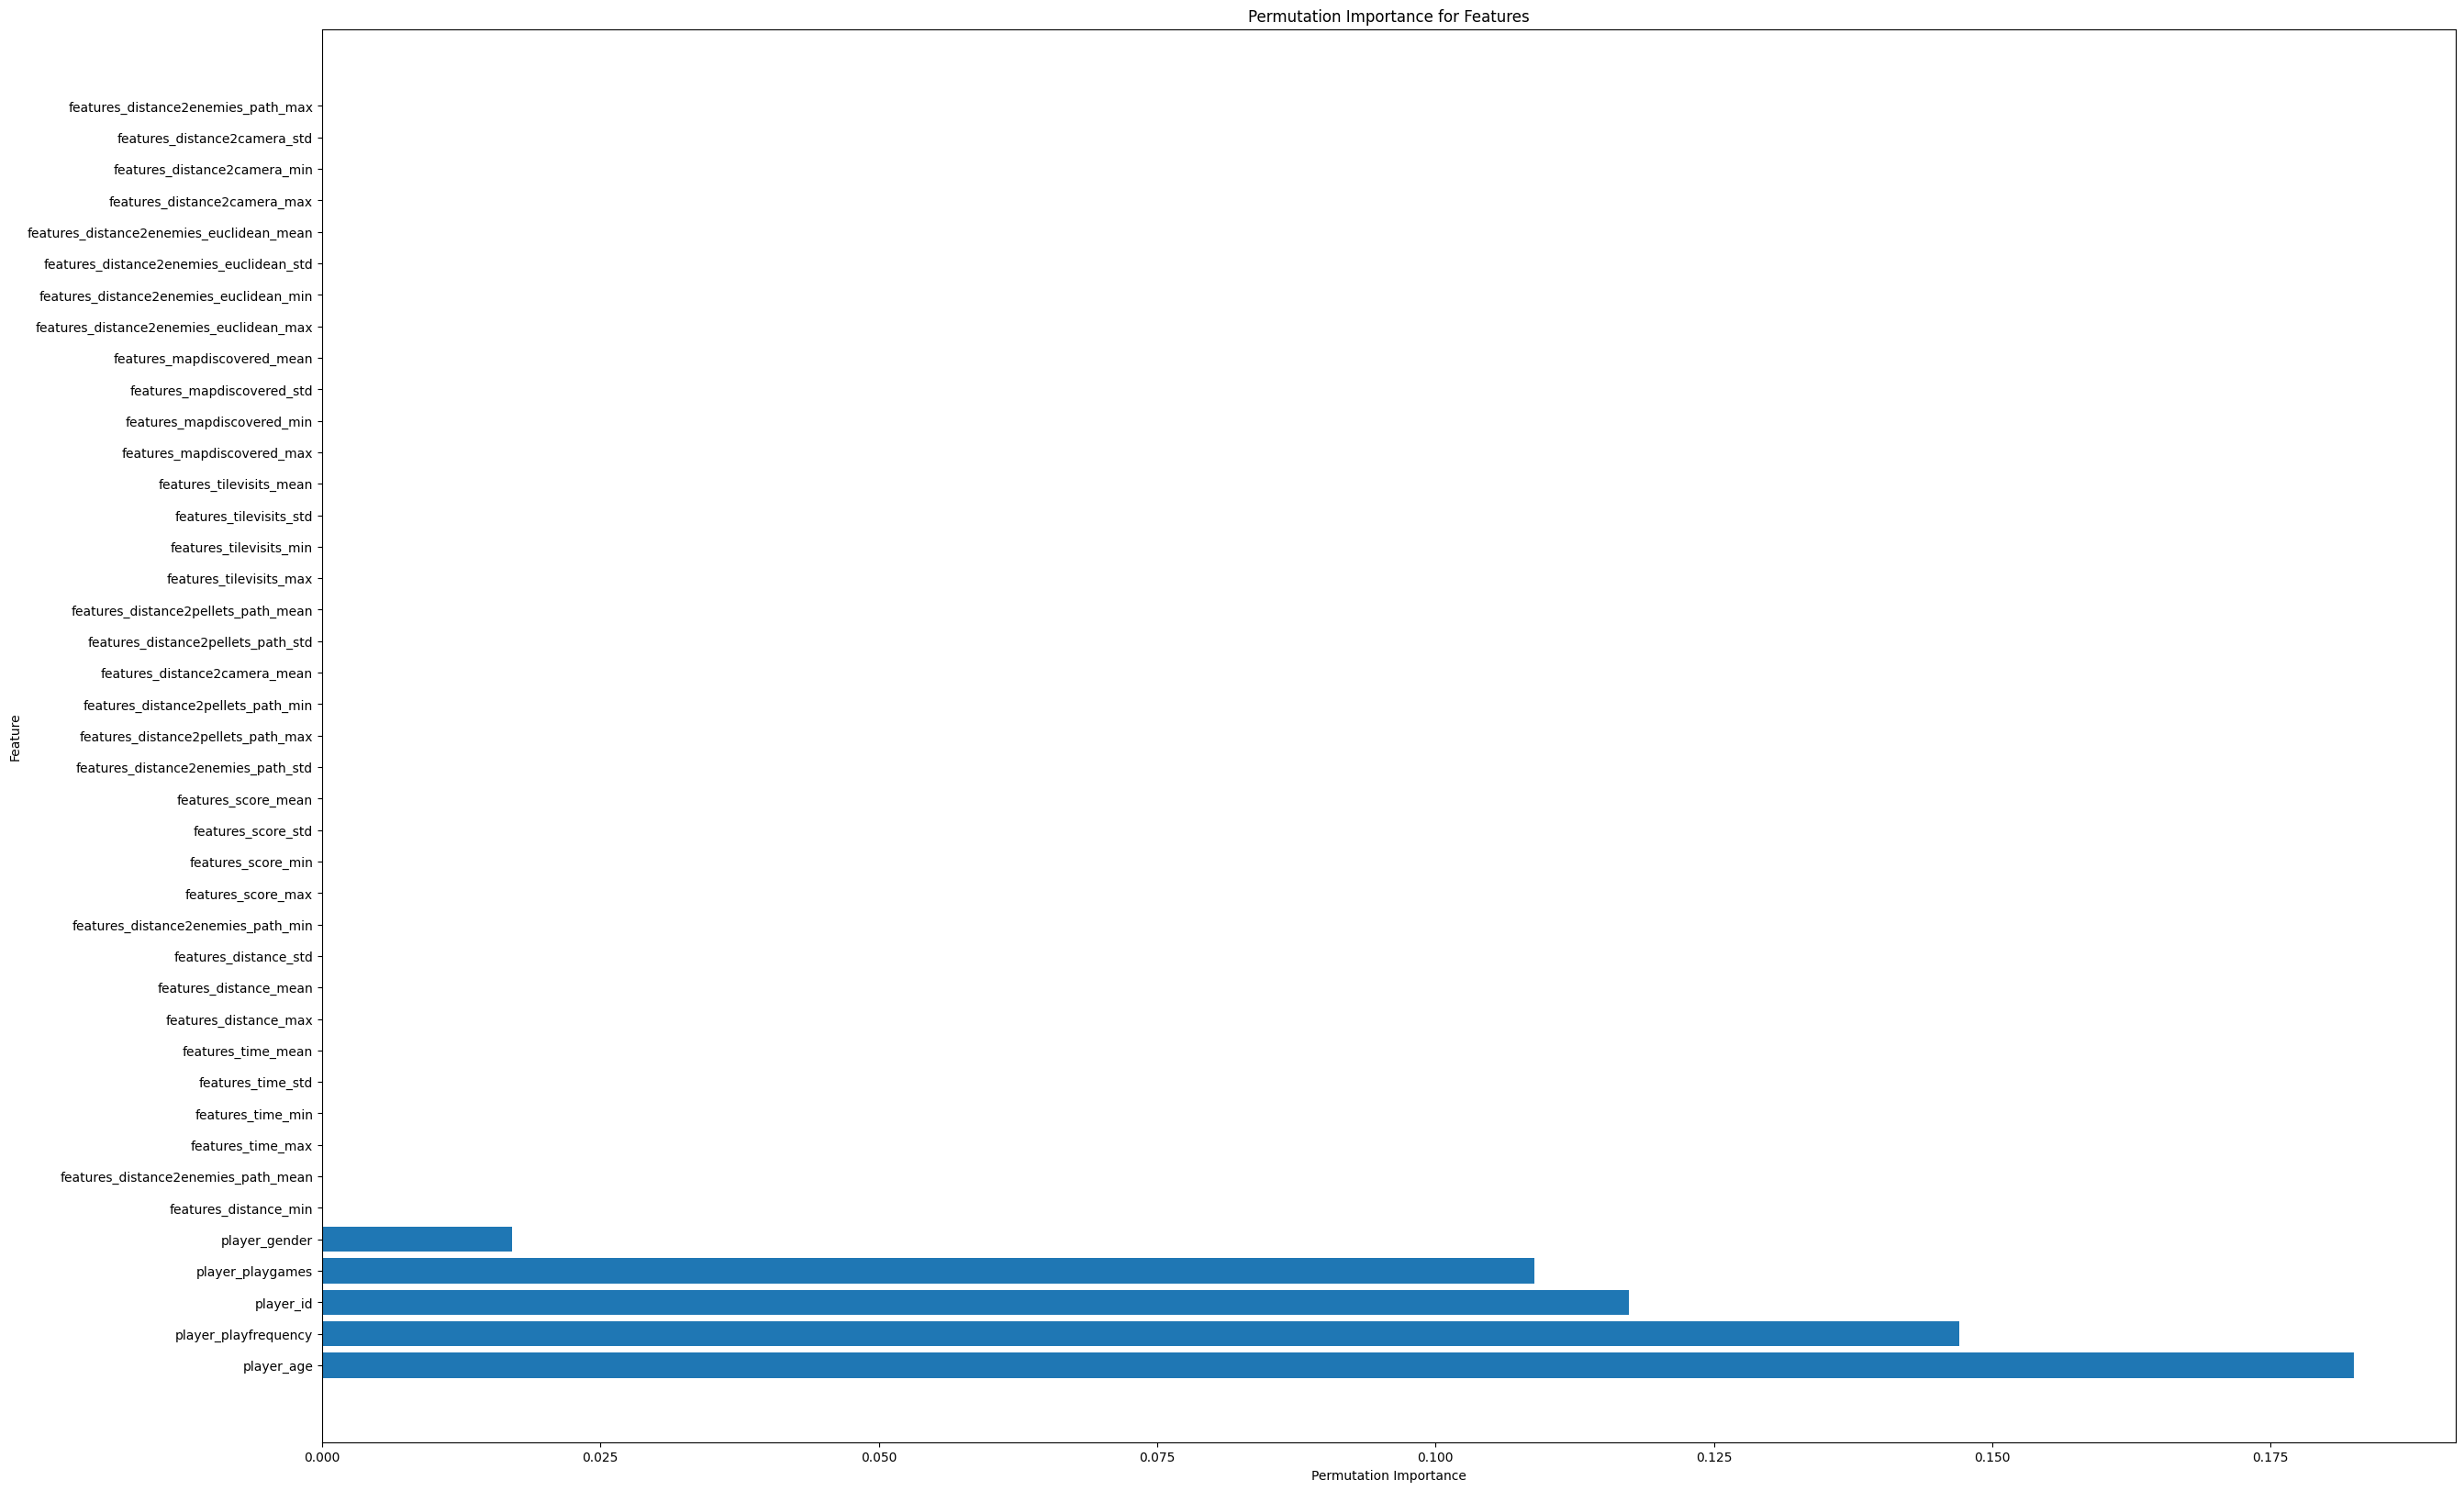

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
result = permutation_importance(regression_model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances and indices
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

# Convert feature_names to a regular Python list
# feature_names_list = list(all_keys_list)
feature_names_list = all_keys_list

# Plot feature importances
plt.figure(figsize=(30, 20))
plt.barh(range(X_test.shape[1]), importances[indices], align="center")

yticks_spacing = 1.5  # Adjust the spacing factor
plt.yticks(range(X_test.shape[1]), [feature_names_list[i] for i in indices])
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")

plt.title("Permutation Importance for Features")
plt.show()


In [ ]:
model_explainable = shap.TreeExplainer(regression_model, data=X)
shap_values = model_explainable.shap_values(X, Y)

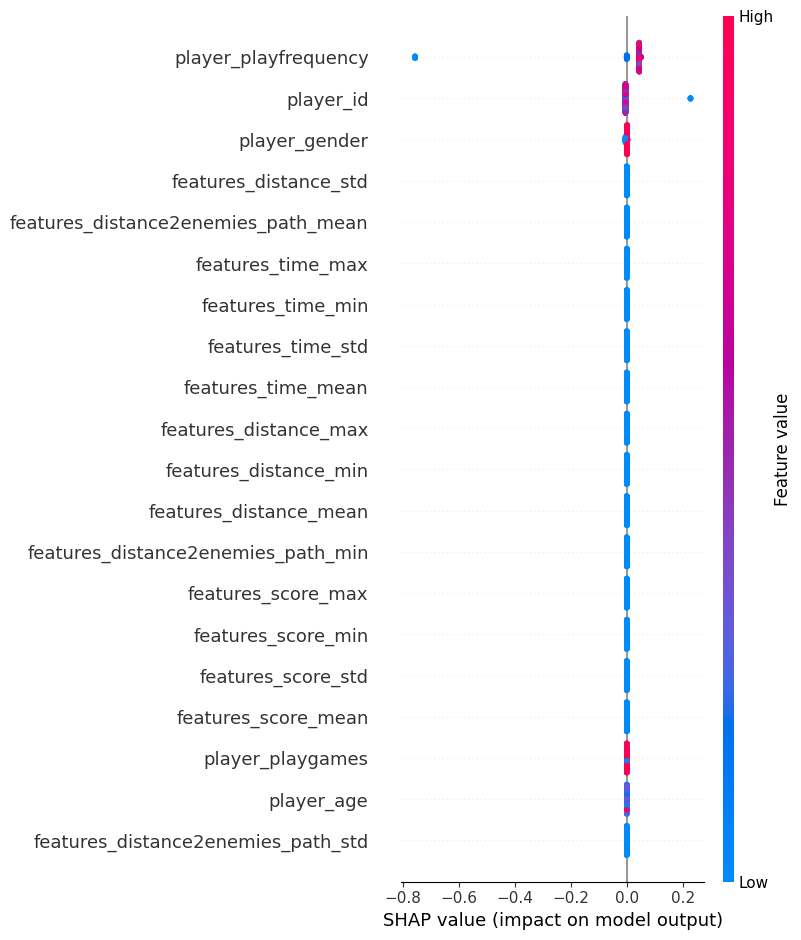

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=feature_names_list)

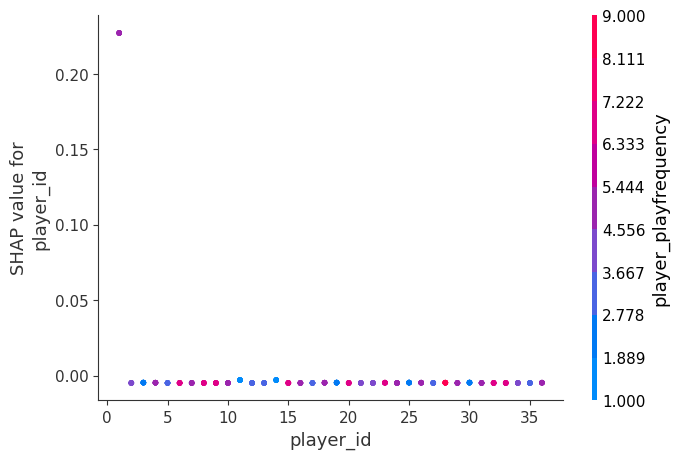

In [ ]:
shap.dependence_plot(0, shap_values, X)

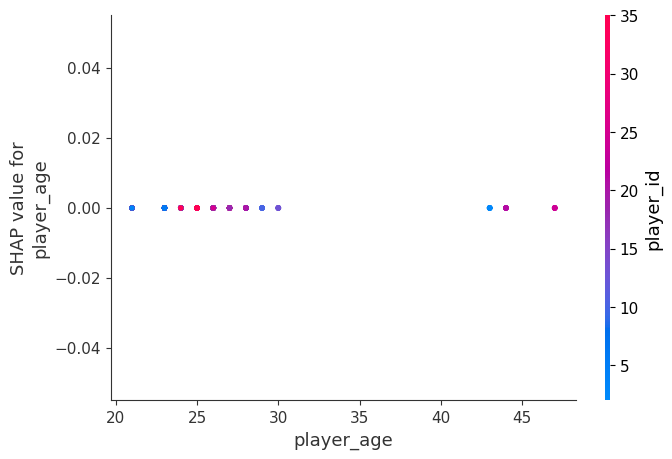

In [ ]:
shap.dependence_plot(1, shap_values, X)

In [ ]:
shap.dependence_plot(2, shap_values, X)

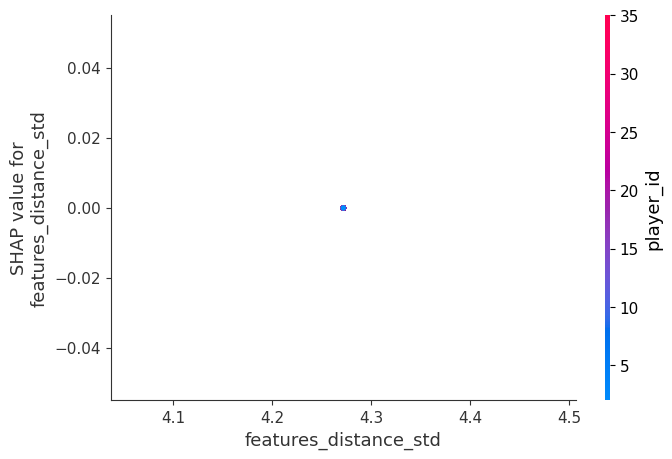

In [ ]:
shap.dependence_plot(10, shap_values, X)

In [ ]:
# How to improve the results?
# There are many modalities: game information, player information, and physiological information
# Which modality is more useful and which is less useful?
# Can the results be improved if the useless information are removed?

Early Stopping:

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' and 'Y' are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Regression Model Training with Early Stopping
regression_model = HistGradientBoostingRegressor(max_iter=1000, early_stopping=True, random_state=42)
regression_model.fit(X_train, y_train)

# Predictions
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.23039547470896513
